In [1]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data.csv


First few rows of the dataset:
   Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)  Grades
0              0.95822          3.4          8.2            53.0    47.0
1              0.85566          3.2          5.9            55.0    35.0
2              0.68025          3.2          9.3            41.0    32.0
3              0.25936          3.2          8.2            47.0    34.0
4              0.60447          3.8         10.0            75.0    33.0

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB
None

Summar

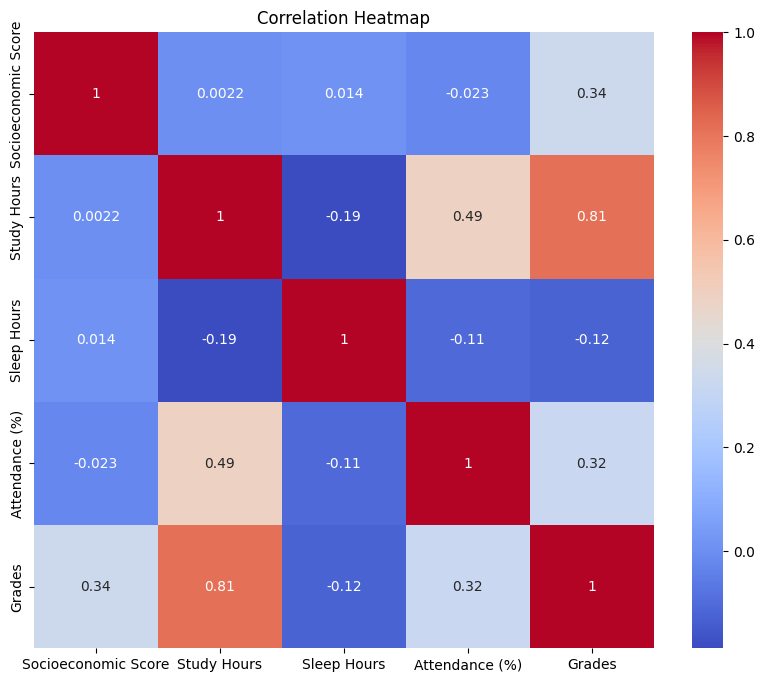


Mean Squared Error: 19.272537728751253
R-squared: 0.7446674729714068


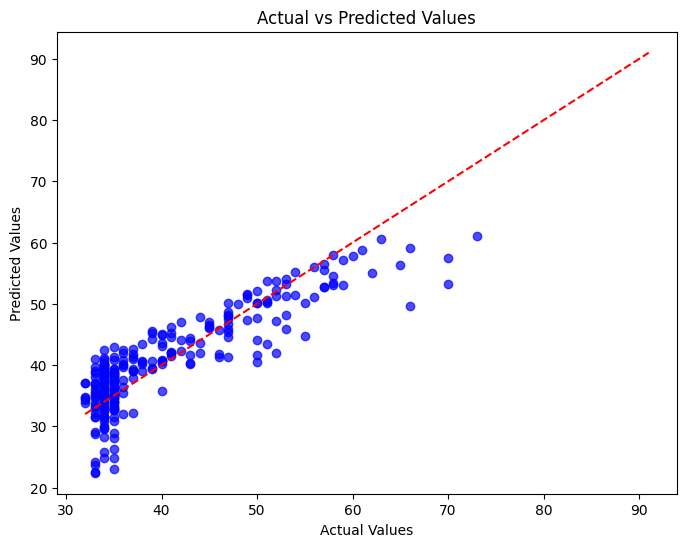

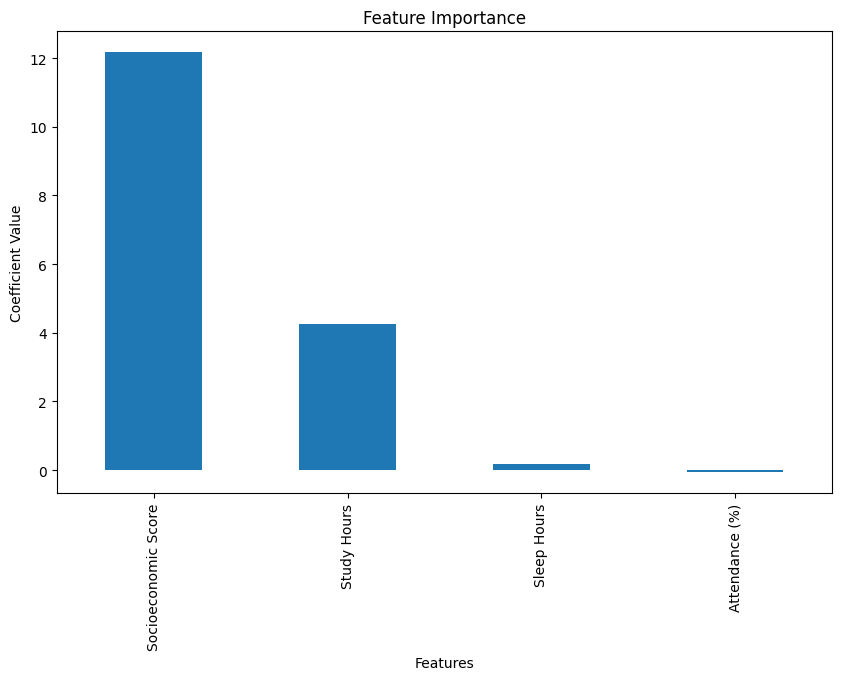


Sample Data Predictions:
Sample 1: Predicted = 44.01, Actual = 43.00
Sample 2: Predicted = 35.00, Actual = 35.00
Sample 3: Predicted = 35.68, Actual = 33.00
Sample 4: Predicted = 36.44, Actual = 36.00
Sample 5: Predicted = 37.31, Actual = 35.00


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("data.csv")

# Display the first few rows
print("First few rows of the dataset:")
print(data.head())

# Display dataset information
print("\nDataset Information:")
print(data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Visualize correlations (if numerical data)
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Handle missing values
data = data.dropna()

# Split features (X) and target (y)
X = data.drop(columns=["Grades"])
y = data["Grades"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# Feature importance visualization (if applicable)
if hasattr(model, "coef_"):
    feature_importance = pd.Series(model.coef_, index=X.columns)
    feature_importance.sort_values(ascending=False, inplace=True)

    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind="bar")
    plt.title("Feature Importance")
    plt.xlabel("Features")
    plt.ylabel("Coefficient Value")
    plt.show()

# Make predictions for some sample data
sample_data = X_test.iloc[:5]
predictions = model.predict(sample_data)
print("\nSample Data Predictions:")
for i, pred in enumerate(predictions):
    print(f"Sample {i + 1}: Predicted = {pred:.2f}, Actual = {y_test.iloc[i]:.2f}")
